<h1>Импорт библиотек

In [6]:
import unittest
import numpy as np
from unittest.mock import patch
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
def matrix_vector_sum(matrices, vectors):
    result = sum(np.dot(matrix, vector) for matrix, vector in zip(matrices, vectors))
    return result


class TestMatrixVectorSum(unittest.TestCase):

    def test_basic_case(self):
        X1 = np.array([[5, 2], [3, 1]])
        X2 = np.array([[2, 4], [5, 8]])
        V1 = np.array([[1], [2]])
        V2 = np.array([[1], [2]])

        matrices = [X1, X2]
        vectors = [V1, V2]

        result = matrix_vector_sum(matrices, vectors)
        expected = np.array([[19], [26]]) 
        np.testing.assert_array_equal(result, expected)

    def test_single_matrix_vector(self):
        X = np.array([[1, 2], [3, 4]])
        V = np.array([[1], [1]])

        matrices = [X]
        vectors = [V]

        result = matrix_vector_sum(matrices, vectors)
        expected = np.array([[3], [7]])
        np.testing.assert_array_equal(result, expected)

    def test_zero_case(self):
        X1 = np.array([[0, 0], [0, 0]])
        X2 = np.array([[0, 0], [0, 0]])
        V1 = np.array([[0], [0]])
        V2 = np.array([[0], [0]])

        matrices = [X1, X2]
        vectors = [V1, V2]

        result = matrix_vector_sum(matrices, vectors)
        expected = np.array([[0], [0]])
        np.testing.assert_array_equal(result, expected)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestMatrixVectorSum))

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):
  return np.where(M > threshold, 1, 0)

class TestBinarize(unittest.TestCase):
    
    def test_basic_case(self):
        M = np.array([[0.2, 0.6], [0.8, 0.1]])
        threshold = 0.5
        result = binarize(M, threshold)
        expected = np.array([[0, 1], [1, 0]])
        np.testing.assert_array_equal(result, expected)
    
    def test_threshold_edge(self):
        M = np.array([[0.5, 0.7], [0.4, 0.5]])
        threshold = 0.5
        result = binarize(M, threshold)
        expected = np.array([[0, 1], [0, 0]]) 
        np.testing.assert_array_equal(result, expected)

    def test_matrix_with_zeros(self):
        M = np.array([[0, 0], [0, 0]])
        threshold = 0.5
        result = binarize(M, threshold)
        expected = np.array([[0, 0], [0, 0]]) 
        np.testing.assert_array_equal(result, expected)

    def test_matrix_with_ones(self):
        M = np.array([[1, 1], [1, 1]])
        threshold = 0.5
        result = binarize(M, threshold)
        expected = np.array([[1, 1], [1, 1]]) 
        np.testing.assert_array_equal(result, expected)
    
    def test_empty_matrix(self):
        M = np.array([[]])
        threshold = 0.5
        result = binarize(M, threshold)
        expected = np.array([[]])  
        np.testing.assert_array_equal(result, expected)

    def test_custom_threshold(self):
        M = np.array([[0.3, 0.7], [0.2, 0.9]])
        threshold = 0.6
        result = binarize(M, threshold)
        expected = np.array([[0, 1], [0, 1]]) 
        np.testing.assert_array_equal(result, expected)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestBinarize))

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(matrix):
    return [np.unique(row) for row in matrix]

def unique_columns(matrix):
    return [np.unique(matrix[:, col]) for col in range(matrix.shape[1])]

import unittest

class TestUniqueElements(unittest.TestCase):

    def test_unique_rows_basic(self):
        matrix = np.array([[1, 2, 2, 3],
                           [4, 4, 5, 5],
                           [1, 1, 1, 1]])
        result = unique_rows(matrix)
        expected = [np.array([1, 2, 3]), np.array([4, 5]), np.array([1])]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)

    def test_unique_rows_empty(self):
        matrix = np.array([[]])
        result = unique_rows(matrix)
        expected = [np.array([])]
        np.testing.assert_array_equal(result[0], expected[0])
    
    def test_unique_columns_basic(self):
        matrix = np.array([[1, 2, 2, 3],
                           [4, 4, 5, 5],
                           [1, 1, 1, 1]])
        result = unique_columns(matrix)
        expected = [np.array([1, 4]), np.array([1, 2, 4]), np.array([1, 2, 5]), np.array([1, 3, 5])]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)

    def test_unique_columns_empty(self):
        matrix = np.array([[]])
        result = unique_columns(matrix)
        expected = []
        self.assertEqual(result, expected)

    def test_unique_all_same(self):
        matrix = np.array([[7, 7, 7],
                           [7, 7, 7],
                           [7, 7, 7]])
        result_rows = unique_rows(matrix)
        result_cols = unique_columns(matrix)
        expected = [np.array([7]), np.array([7]), np.array([7])]
        for r in result_rows:
            np.testing.assert_array_equal(r, expected[0])
        for c in result_cols:
            np.testing.assert_array_equal(c, expected[0])

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestUniqueElements))



.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

...
----------------------------------------------------------------------
Ran 3 tests in 0.078s

OK


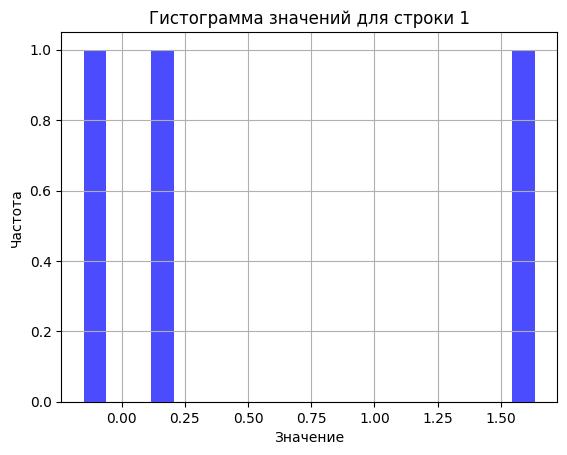

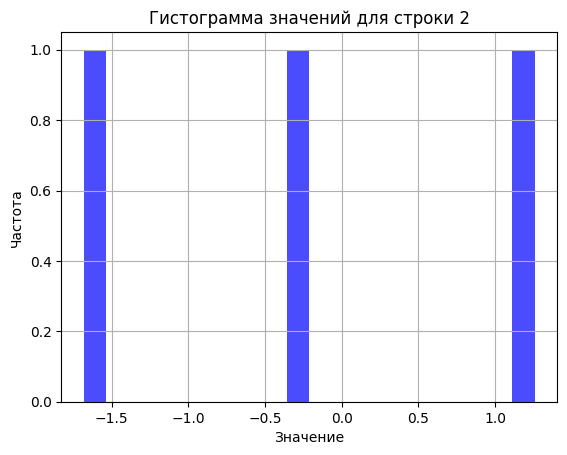

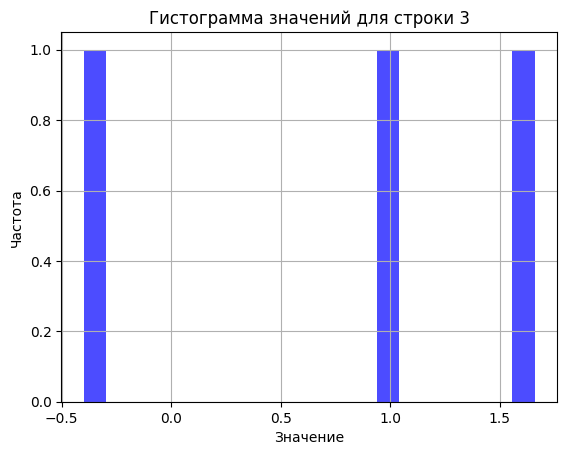

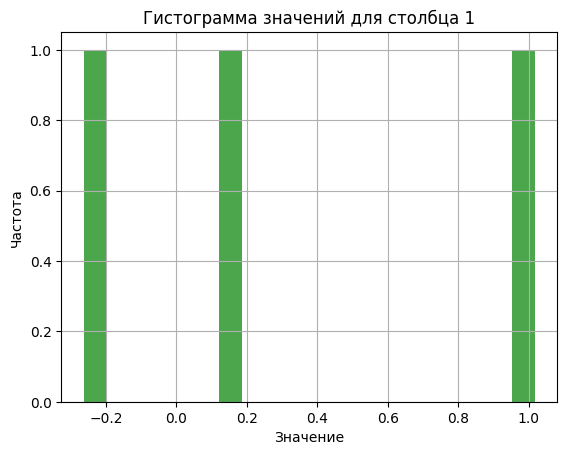

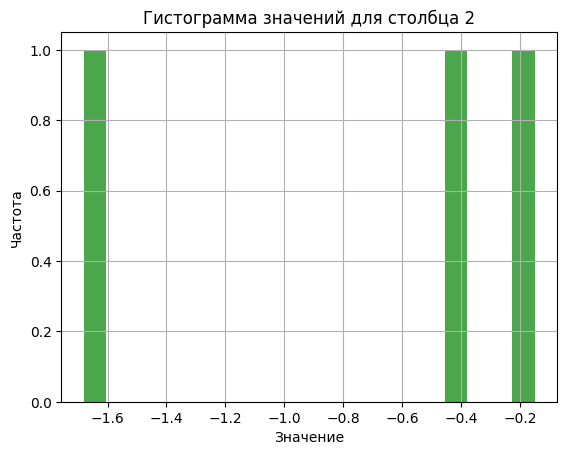

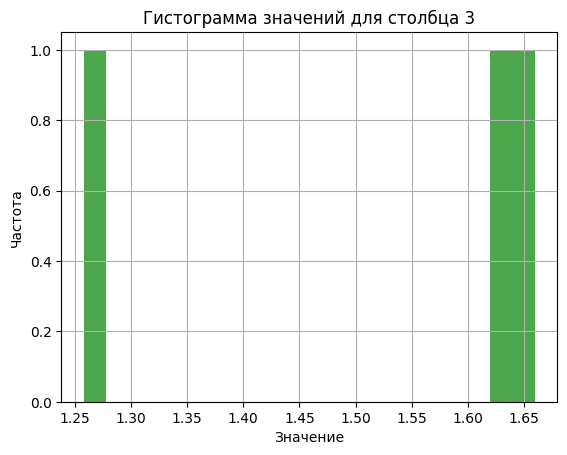

In [7]:
def create_normal_distribution_matrix(rows, cols):
    matrix = np.random.normal(size=(rows, cols))
    return matrix

def get_mean_and_variance(matrix):
    if matrix.size == 0: 
        return {
            "mean_rows": np.array([]),
            "variance_rows": np.array([]),
            "mean_columns": np.array([]),
            "variance_columns": np.array([])
        }
    
    mean_rows = np.mean(matrix, axis=1)
    variance_rows = np.var(matrix, axis=1)
    
    mean_columns = np.mean(matrix, axis=0)
    variance_columns = np.var(matrix, axis=0)
    
    return {
        "mean_rows": mean_rows,
        "variance_rows": variance_rows,
        "mean_columns": mean_columns,
        "variance_columns": variance_columns
    }


def draw_histograms(matrix):
    rows, cols = matrix.shape
    
    for row_idx in range(rows):
        plt.figure()
        plt.hist(matrix[row_idx, :], bins=20, color='blue', alpha=0.7)
        plt.title(f'Гистограмма значений для строки {row_idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for col_idx in range(cols):
        plt.figure()
        plt.hist(matrix[:, col_idx], bins=20, color='green', alpha=0.7)
        plt.title(f'Гистограмма значений для столбца {col_idx + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

class TestMatrixFunctions(unittest.TestCase):

    def test_create_normal_distribution_matrix(self):
        rows, cols = 4, 3
        matrix = create_normal_distribution_matrix(rows, cols)

        self.assertEqual(matrix.shape, (rows, cols))

        self.assertAlmostEqual(np.mean(matrix), 0, delta=0.5)

        self.assertAlmostEqual(np.var(matrix), 1, delta=0.5)

    def test_get_mean_and_variance(self):
        matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        
        result = get_mean_and_variance(matrix)

        expected_mean_rows = np.array([2.0, 5.0, 8.0])
        expected_variance_rows = np.array([2/3, 2/3, 2/3])
        
        expected_mean_columns = np.array([4.0, 5.0, 6.0])
        expected_variance_columns = np.array([6.0, 6.0, 6.0])

        np.testing.assert_array_almost_equal(result['mean_rows'], expected_mean_rows, decimal=2)

        np.testing.assert_array_almost_equal(result['variance_rows'], expected_variance_rows, decimal=2)

        np.testing.assert_array_almost_equal(result['mean_columns'], expected_mean_columns, decimal=2)

        np.testing.assert_array_almost_equal(result['variance_columns'], expected_variance_columns, decimal=2)

    @patch('matplotlib.pyplot.show')
    def test_draw_histograms(self, mock_show):
        matrix = np.random.normal(size=(3, 3))

        draw_histograms(matrix)
        
        self.assertEqual(mock_show.call_count, 6)

def test_empty_matrix(self):
    matrix = np.array([[]])

    result = get_mean_and_variance(matrix)

    np.testing.assert_array_equal(result['mean_rows'], np.array([]))
    np.testing.assert_array_equal(result['variance_rows'], np.array([]))
    np.testing.assert_array_equal(result['mean_columns'], np.array([]))
    np.testing.assert_array_equal(result['variance_columns'], np.array([]))



if __name__ == "__main__":
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestMatrixFunctions))


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

import unittest
import numpy as np

class TestChessMatrix(unittest.TestCase):

    def test_chess_3x3(self):
        result = chess(3, 3, 1, 0)
        expected = np.array([[1, 0, 1],
                             [0, 1, 0],
                             [1, 0, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_chess_4x4(self):
        result = chess(4, 4, 5, -3)
        expected = np.array([[5, -3, 5, -3],
                             [-3, 5, -3, 5],
                             [5, -3, 5, -3],
                             [-3, 5, -3, 5]])
        np.testing.assert_array_equal(result, expected)

    def test_chess_2x2(self):
        result = chess(2, 2, 10, -10)
        expected = np.array([[10, -10],
                             [-10, 10]])
        np.testing.assert_array_equal(result, expected)

    def test_chess_1x1(self):
        result = chess(1, 1, 7, 3)
        expected = np.array([[7]]) 
        np.testing.assert_array_equal(result, expected)

    def test_chess_1x3(self):
        result = chess(1, 3, 8, 2)
        expected = np.array([[8, 2, 8]]) 
        np.testing.assert_array_equal(result, expected)

    def test_chess_empty(self):
        result = chess(0, 0, 1, 2)
        expected = np.array([]).reshape(0, 0)
        np.testing.assert_array_equal(result, expected)

    def test_chess_3x2(self):
        result = chess(3, 2, 4, -4)
        expected = np.array([[4, -4],
                             [-4, 4],
                             [4, -4]])
        np.testing.assert_array_equal(result, expected)

    def test_chess_2x3(self):
        result = chess(2, 3, 9, -9)
        expected = np.array([[9, -9, 9],
                             [-9, 9, -9]])
        np.testing.assert_array_equal(result, expected)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestChessMatrix))


........
----------------------------------------------------------------------
Ran 8 tests in 0.004s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

....
----------------------------------------------------------------------
Ran 4 tests in 0.045s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

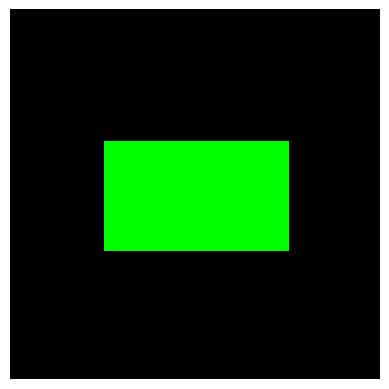

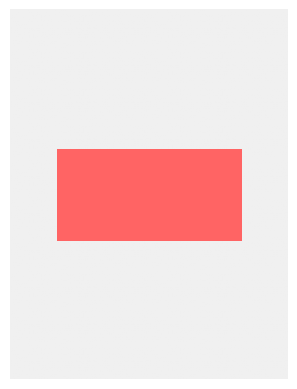

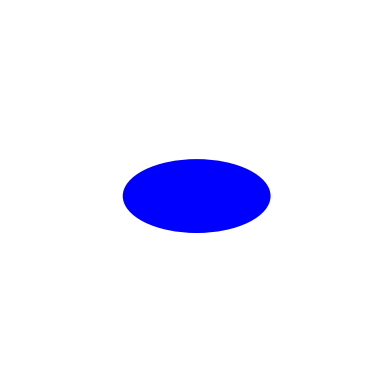

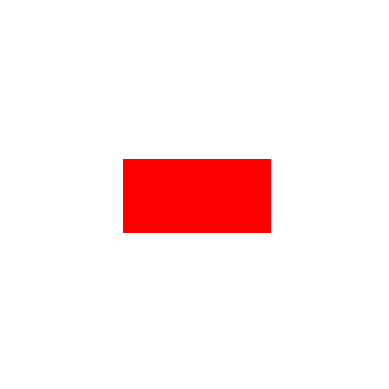

In [13]:

from matplotlib.patches import Rectangle, Ellipse

def normalize_color(color):
    """Normalize RGB color values to be between 0 and 1."""
    return tuple(c / 255 for c in color)

def draw_shape(image, m, n, shape, shape_args, shape_color, bg_color=(255, 255, 255)):
    """Draw a generic shape (Rectangle or Ellipse) on the image."""

    shape_color = normalize_color(shape_color)
    bg_color = normalize_color(bg_color)

    image[:, :] = bg_color

    fig, ax = plt.subplots()

    if shape == 'rectangle':
        ax.add_patch(Rectangle(**shape_args, edgecolor='none', facecolor=shape_color))
    elif shape == 'ellipse':
        ax.add_patch(Ellipse(**shape_args, edgecolor='none', facecolor=shape_color))

    ax.imshow(image)
    plt.axis('off')
    plt.show()

def draw_rectangle(image, m, n, a, b, rect_color, bg_color=(255, 255, 255)):
    """Draw a rectangle of size a by b in the center of the image."""
    shape_args = {'xy': (int((n-a)/2), int((m-b)/2)), 'width': a, 'height': b}
    draw_shape(image, m, n, 'rectangle', shape_args, rect_color, bg_color)

def draw_ellipse(image, m, n, a, b, ellipse_color, bg_color=(255, 255, 255)):
    """Draw an ellipse of width 2*a and height 2*b in the center of the image."""
    shape_args = {'xy': (int(n/2), int(m/2)), 'width': 2*a, 'height': 2*b}
    draw_shape(image, m, n, 'ellipse', shape_args, ellipse_color, bg_color)

    import unittest
import numpy as np
from unittest.mock import patch

class TestDrawShapes(unittest.TestCase):

    @patch('matplotlib.pyplot.show')
    def test_draw_rectangle(self, mock_show):
        m, n = 100, 100
        a, b = 40, 20
        image = np.ones((m, n, 3))
        rect_color = (255, 0, 0) 
        bg_color = (255, 255, 255)

        draw_rectangle(image, m, n, a, b, rect_color, bg_color)

        self.assertEqual(mock_show.call_count, 1)

        np.testing.assert_array_almost_equal(image[0, 0], np.array([1.0, 1.0, 1.0])) 

    @patch('matplotlib.pyplot.show')
    def test_draw_ellipse(self, mock_show):
        m, n = 100, 100
        a, b = 20, 10
        image = np.ones((m, n, 3))
        ellipse_color = (0, 0, 255)  
        bg_color = (255, 255, 255)  

        draw_ellipse(image, m, n, a, b, ellipse_color, bg_color)

        self.assertEqual(mock_show.call_count, 1)

        np.testing.assert_array_almost_equal(image[0, 0], np.array([1.0, 1.0, 1.0])) 

    @patch('matplotlib.pyplot.show')
    def test_custom_bg_color(self, mock_show):
        m, n = 100, 100
        a, b = 50, 30
        image = np.ones((m, n, 3))
        rect_color = (0, 255, 0)  
        bg_color = (0, 0, 0)  

        draw_rectangle(image, m, n, a, b, rect_color, bg_color)

        self.assertEqual(mock_show.call_count, 1)

        np.testing.assert_array_almost_equal(image[0, 0], np.array([0.0, 0.0, 0.0])) 

    @patch('matplotlib.pyplot.show')
    def test_different_sizes(self, mock_show):
        m, n = 200, 150
        a, b = 100, 50
        image = np.ones((m, n, 3))
        rect_color = (255, 100, 100) 
        bg_color = (240, 240, 240)  

        draw_rectangle(image, m, n, a, b, rect_color, bg_color)

        self.assertEqual(mock_show.call_count, 1)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestDrawShapes))



<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [28]:
def solve(row, p):
    mean = np.mean(row)
    variance = np.var(row)
    std = np.std(row)

    local_min = []
    local_max = []
    
    for i in range(1, len(row) - 1):
        if row[i] < row[i-1] and row[i] < row[i+1]:
            local_min.append(row[i])
        elif row[i] > row[i-1] and row[i] > row[i+1]:
            local_max.append(row[i])

    mov_avg = np.convolve(row, np.ones(p) / p, mode='valid')

    return mean, variance, std, local_min, local_max, mov_avg

mean, variance, std, local_min, local_max, mov_avg = solve(np.array([6, 4, 6, 8, 4, 12, 14, 10, 18, 20]), 3)
print(f"Мат. ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Станд. отклонение: {std}")
print(f"Локальные минимумы: {local_min}")
print(f"Локальные максимумы: {local_max}")
print(f"Скользящее среднее: {mov_avg}")

Мат. ожидание: 10.2
Дисперсия: 29.160000000000004
Станд. отклонение: 5.4
Локальные минимумы: [np.int64(4), np.int64(4), np.int64(10)]
Локальные максимумы: [np.int64(8), np.int64(14)]
Скользящее среднее: [ 5.33333333  6.          6.          8.         10.         12.
 14.         16.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [32]:
def one_hot_encoding(labels):

    num_classes = np.max(labels) + 1

    one_hot_matrix = np.zeros((len(labels), num_classes))

    one_hot_matrix[np.arange(len(labels)), labels] = 1
    return one_hot_matrix


labels = [0, 2, 3, 0]
print(one_hot_encoding(labels))


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
